# Unit 5 - Financial Planning


In [310]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import json
%matplotlib inline

In [311]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [312]:
# Set current amount of crypto assets
my_btc = 1.20
my_eth = 5.300

In [313]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [314]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent = 5))
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_price)

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent = 5))
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

69273.6509
2146.677306
The current value of your 1.2 BTC is $83128.38
The current value of your 5.3 ETH is $11377.39


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [315]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [316]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("Alpaca_Secret_Key")
type(api_key)
type(api_secret)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret,
    base_url = "https://paper-api.alpaca.markets",
    api_version="v2")

In [317]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [318]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [319]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [320]:
# Set monthly household income
monthly_income = 12000

total_crypto_value = round((my_eth_value + my_btc_value),2)
total_share_value = round((my_agg_value + my_spy_value),2)
data = [{'Amount': total_crypto_value}, {'Amount': total_share_value}] 
# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,94505.77
Shares,42175.00


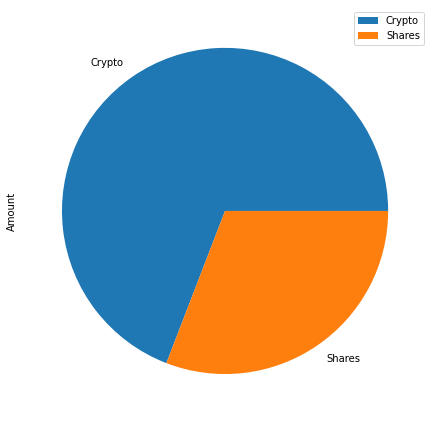

In [321]:
# Plot savings pie chart
plot = df_savings.plot.pie(y='Amount',figsize = (7.5,7.5))

In [322]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_share_value

# Validate saving health
if total_savings >= emergency_fund:
    x = "CONGRATULATIONS! You've reached your financial goal!"
else:
    x = (f"You are ${str(round((emergency_fund - total_savings),2))} from your goal!")
print(x)

CONGRATULATIONS! You've reached your financial goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [323]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_1 = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date_1 = pd.Timestamp('2017-03-29', tz='America/New_York').isoformat()


start_date_2 = pd.Timestamp('2017-03-30', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [324]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_1,
    end = end_date_1,
    limit = 1000
).df

df_stock_data_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_2,
    end = end_date_2,
    limit = 1000
).df

# Display sample data
#df_stock_data.head()
#df_stock_data.tail()
frames = [df_stock_data_1, df_stock_data_2]
df_stock_data = pd.concat(frames)
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2016-03-21 00:00:00-04:00  204.07  204.94  203.800  204.68  55119916  
2016-03-22 00:00:00-04:00  203.76  205.23  203.570  204.59  71913432  
2016-03-23 00:00:00-04:00  204.11  204.33  203.010  203.24  67124272  
2016-03-24 00:00:00-04:00  202.00  203.16  201.740  203.14  63975239  
2016-03-28 00:00:00-04:00  203.61  203.86  202.705  203.26  51054477

In [325]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_Stocks = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [326]:
# Printing the simulation input data
print(MC_Stocks)

In [327]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001560,1.003220,0.999076,0.998251,1.000502,0.999327,1.003237,1.007012,0.995386,1.007915,...,0.998861,0.996466,1.005218,0.988967,0.994500,0.999988,1.001473,0.996872,1.002529,0.997900
2,0.995646,1.001399,0.995429,0.991077,0.990038,1.004042,0.995927,1.006474,0.991512,0.998974,...,1.002091,0.995988,1.005321,0.988172,0.992635,0.987119,1.005606,1.001418,0.999559,0.999750
3,1.005153,1.011778,0.983954,0.993332,0.990306,1.017517,0.987589,1.016565,0.990464,0.995985,...,1.000407,0.993620,1.003277,0.990822,0.992844,0.989179,1.007127,1.007709,0.994398,0.996954
4,1.006526,1.004111,0.990156,0.992261,0.989004,1.014977,0.986239,1.014315,0.986579,0.998235,...,1.012521,0.986646,1.005935,0.998921,0.994019,0.987463,0.999223,1.006277,0.984701,0.991278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.853138,19.186750,19.556650,6.492228,5.972357,4.747417,19.720218,7.912649,6.068316,14.519126,...,16.726917,6.920576,8.647572,4.298703,3.861779,7.663357,10.329425,19.039491,16.652823,2.415719
7557,10.047598,19.217325,19.454347,6.512969,5.972078,4.715457,19.557971,7.943192,6.075338,14.575618,...,17.004778,6.940261,8.667261,4.296385,3.852902,7.533181,10.334383,18.885270,16.775122,2.430846
7558,10.042694,19.249756,19.533784,6.478759,6.038281,4.663844,19.631754,7.934359,6.105784,14.408537,...,16.798446,6.962826,8.642865,4.268860,3.853393,7.537701,10.383969,18.848240,16.662172,2.441324
7559,10.066697,19.278093,19.573931,6.540243,6.027247,4.674129,19.654796,7.914562,6.085771,14.387042,...,16.831372,6.948146,8.700264,4.264048,3.871485,7.591298,10.319827,18.904334,16.669010,2.447686


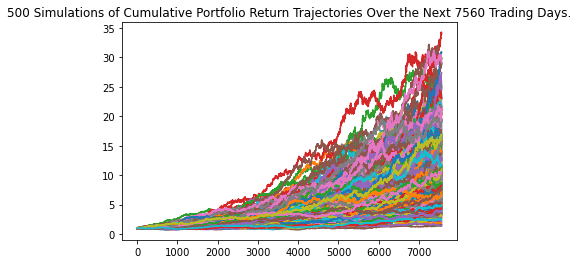

In [328]:
# Plot simulation outcomes
line_plot = MC_Stocks.plot_simulation()

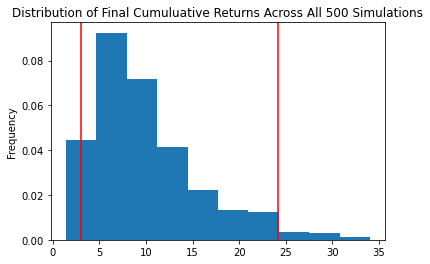

In [329]:
# Plot probability distribution and confidence intervals
distr_plot = MC_Stocks.plot_distribution()

### Retirement Analysis

In [330]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_returns_data = {
    "mean": list(MC_Stocks.simulated_return.mean(axis=1)),
    "median": list(MC_Stocks.simulated_return.median(axis=1)),
    "min": list(MC_Stocks.simulated_return.min(axis=1)),
    "max": list(MC_Stocks.simulated_return.max(axis=1))
}

df_returns_data = pd.DataFrame(MC_returns_data)
# Print summary statistics
display(df_returns_data)

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000225,1.000300,0.981521,1.019120
2,1.000514,1.000646,0.976493,1.024309
3,1.000740,1.000987,0.970573,1.034317
4,1.001137,1.001317,0.967727,1.041997
...,...,...,...,...
7556,9.994924,8.424999,1.372629,33.937146
7557,9.997547,8.437414,1.361964,33.940429
7558,9.998546,8.441683,1.366064,34.252827
7559,9.998013,8.453457,1.379924,34.263960


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [331]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
output = MC_Stocks.summarize_cumulative_return()

ci_lower = round(output[8]*initial_investment,2)
ci_upper = round(output[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 30 years will end within the range of ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $60559.42 and $482564.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [332]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
output = MC_Stocks.summarize_cumulative_return()

ci_lowerr = round(output[8]*initial_investment1,2)
ci_upperr = round(output[9]*initial_investment1,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within the range of ${ci_lowerr} and ${ci_upperr}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $90839.12 and $723846.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [333]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_Stocks1 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [334]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Stocks1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993480,0.989896,0.996964,1.002329,1.016221,0.993979,0.998041,1.004843,0.988982,1.009307,...,0.996050,1.001093,1.010851,1.004339,1.005476,0.999897,1.002631,0.995245,0.998539,0.998682
2,0.993036,0.982917,0.997829,0.993170,1.014339,1.002594,1.001110,0.999444,0.997120,1.009541,...,1.004503,1.006037,1.018478,0.991975,1.012784,1.008419,1.014865,1.000249,0.993213,0.987838
3,0.992798,0.976341,0.998498,0.995306,1.011878,1.005340,1.000964,1.010784,0.995408,1.007087,...,1.002139,1.002435,1.016781,0.989855,1.011122,1.011984,1.016990,0.997889,0.999554,0.991433
4,0.998366,0.972882,1.001179,1.003404,1.009743,1.001582,1.006819,1.012917,0.988518,1.014280,...,0.995157,1.006088,1.013787,0.990789,1.007782,1.022001,1.010558,0.985250,0.994839,0.998418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.139623,1.268161,1.517263,1.823178,0.903122,1.782502,2.021209,1.287987,1.930517,1.812285,...,1.185501,1.383442,1.743926,1.271346,1.526478,1.080099,1.511798,1.552086,1.772393,1.435512
1257,1.138241,1.259695,1.511930,1.807010,0.900880,1.801600,2.033291,1.304990,1.939002,1.800491,...,1.185921,1.401842,1.752694,1.273879,1.524521,1.084748,1.518857,1.546803,1.765086,1.422203
1258,1.136304,1.257549,1.509792,1.796964,0.907474,1.790946,2.045816,1.308734,1.950959,1.802008,...,1.184898,1.410792,1.764269,1.272782,1.515302,1.084185,1.518082,1.559831,1.783851,1.427742
1259,1.145540,1.262279,1.528916,1.809474,0.920598,1.789984,2.040375,1.314631,1.975300,1.798192,...,1.194002,1.404504,1.757593,1.285500,1.501312,1.086405,1.524255,1.568177,1.786603,1.439236


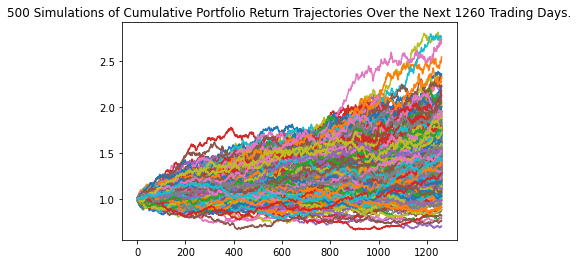

In [335]:
# Plot simulation outcomes
line_plot = MC_Stocks1.plot_simulation()

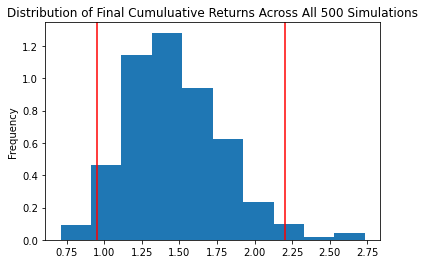

In [336]:
# Plot probability distribution and confidence intervals
distr_plot = MC_Stocks1.plot_distribution()

In [337]:
# Fetch summary statistics from the Monte Carlo simulation results

MC_returns_data1 = {
    "mean": list(MC_Stocks1.simulated_return.mean(axis=1)),
    "median": list(MC_Stocks1.simulated_return.median(axis=1)),
    "min": list(MC_Stocks1.simulated_return.min(axis=1)),
    "max": list(MC_Stocks1.simulated_return.max(axis=1))
}

df_returns_data1 = pd.DataFrame(MC_returns_data1)

# Print summary statistics
display(df_returns_data1)

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000181,1.000346,0.981688,1.016350
2,1.000556,1.000441,0.977350,1.027557
3,1.000837,1.000577,0.971959,1.036547
4,1.001157,1.001034,0.969580,1.044124
...,...,...,...,...
1256,1.467497,1.435679,0.696816,2.761632
1257,1.468049,1.435980,0.706511,2.774699
1258,1.468238,1.437083,0.706995,2.731298
1259,1.468355,1.434814,0.703142,2.733088


In [338]:
# Set initial investment
initial_investment_x = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

output_x = MC_Stocks1.summarize_cumulative_return()

ci_lower_x = round(output_x[8]*initial_investment_x,2)
ci_upper_x = round(output_x[9]*initial_investment_x,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_x} in the portfolio"
      f" over the next 5 years will end within in the range of ${ci_lower_x} and ${ci_upper_x}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56941.89 and $132062.19


### Ten Years Retirement Option

In [339]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_Stocks_Ret = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [340]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Stocks_Ret.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000792,0.995072,0.995816,1.002216,1.000714,1.004145,1.004687,1.009861,1.001728,1.001232,...,1.005440,0.994967,0.995399,0.991379,0.997748,1.007722,0.992848,1.001940,0.998947,0.994034
2,1.002914,1.003193,0.992643,1.002973,0.997493,0.996383,1.002497,1.012545,1.002848,0.997497,...,1.003476,0.988351,1.001048,0.989884,0.999820,1.006616,1.003023,1.001849,0.994873,0.994513
3,1.009527,0.988476,0.997693,1.003855,0.987472,1.011285,1.009635,1.022861,0.984542,0.989073,...,1.003275,0.989052,1.003329,0.995399,0.999042,1.000710,1.000196,0.994741,0.997479,0.987017
4,1.003727,0.986561,0.991607,1.010902,0.986946,1.017031,1.015896,1.021997,0.987239,0.992571,...,1.019379,0.986285,1.004547,1.000300,1.013332,1.005858,0.998306,0.990340,1.007762,0.993903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.962979,2.432056,1.615958,1.644461,1.572564,3.041690,2.475088,1.762154,3.416513,1.527778,...,1.494953,2.417291,1.970920,1.816704,2.891155,1.711628,1.400938,1.882777,1.809019,2.235762
2517,1.960853,2.420548,1.625707,1.644129,1.564712,3.072100,2.493516,1.740874,3.437140,1.522813,...,1.503761,2.435632,1.982869,1.802817,2.886529,1.735442,1.399178,1.869017,1.822563,2.237032
2518,1.963282,2.402688,1.622157,1.648819,1.559472,3.081713,2.512209,1.732706,3.434972,1.527537,...,1.512998,2.433742,1.980890,1.799013,2.880412,1.715881,1.391897,1.880969,1.833404,2.231224
2519,1.963484,2.395276,1.612646,1.637664,1.563380,3.071849,2.520003,1.738559,3.432150,1.529999,...,1.506734,2.420478,1.989573,1.784568,2.894452,1.722479,1.393247,1.875797,1.818524,2.239258


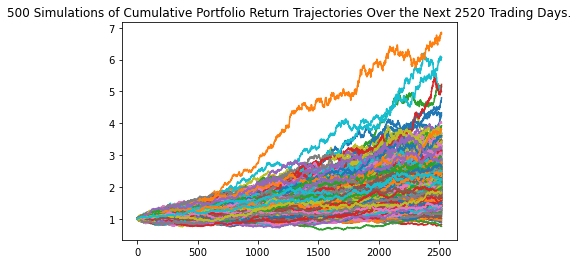

In [341]:
# Plot simulation outcomes
line_plot = MC_Stocks_Ret.plot_simulation()

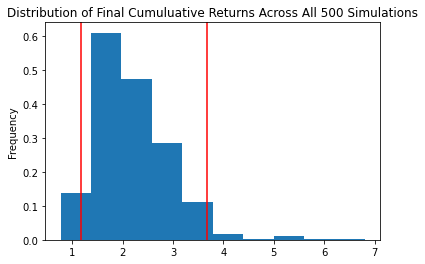

In [342]:
# Plot probability distribution and confidence intervals
distri_plot = MC_Stocks_Ret.plot_distribution()

In [343]:
# Fetch summary statistics from the Monte Carlo simulation results


MC_returns_data_Ret = {
    "mean": list(MC_Stocks_Ret.simulated_return.mean(axis=1)),
    "median": list(MC_Stocks_Ret.simulated_return.median(axis=1)),
    "min": list(MC_Stocks_Ret.simulated_return.min(axis=1)),
    "max": list(MC_Stocks_Ret.simulated_return.max(axis=1))
}

df_returns_data_ret = pd.DataFrame(MC_returns_data_Ret)

# Print summary statistics
display(df_returns_data1)

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000181,1.000346,0.981688,1.016350
2,1.000556,1.000441,0.977350,1.027557
3,1.000837,1.000577,0.971959,1.036547
4,1.001157,1.001034,0.969580,1.044124
...,...,...,...,...
1256,1.467497,1.435679,0.696816,2.761632
1257,1.468049,1.435980,0.706511,2.774699
1258,1.468238,1.437083,0.706995,2.731298
1259,1.468355,1.434814,0.703142,2.733088


In [345]:
# Set initial investment
initial_investment_ret = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000



output_ret = MC_Stocks_Ret.summarize_cumulative_return()

ci_lower_ret = round(output_ret[8]*initial_investment_ret,2)
ci_upper_ret = round(output_ret[9]*initial_investment_ret,2)



# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000




# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ret} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ret} and ${ci_upper_ret}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70283.91 and $219824.6
